In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold

In [42]:
data = pd.read_csv('MNIST_CV.csv', skiprows=[0], header=None)

In [43]:
def sigmoid(x):
    """
    Sigmoid functio as defined in the slides given an input x
    From Andrew Ng Machine learning course on Coursera
    """
    
    return (1.0 / (1.0 + np.exp(-x)))

def predict(X, weights):
    return sigmoid(np.dot(X, weights))

def cost(y, X, weights):
    """
    Grabbed this cost function from Andrew Ng course
    Cost(h_theta(x), y) = 
            (-ylog(h_theta(x)) + (1-y)log(1-h_theta(x)))/m
    """
    m = y.size
    predictions = predict(X, weights)
    cost = np.sum((-y * np.log(predictions)) + ((1-y) * np.log(1-predictions)))
    return  (cost / float(m))

def log_regression(y, X, n, lr):
    weights = np.zeros(X.shape[1])
    costs = []
    m = y.size
    
    for i in range(n):
        descent = (np.dot((predict(X, weights) - y).T, X)).T
        weights = weights - lr * descent
        costs.append(cost(y, X, weights))
    return weights, costs

In [44]:
kfold = KFold(n_splits=10, shuffle=True)
all_costs = []
fprs = []
tprs = []

for train_index, test_index in kfold.split(data):
    y_training = data.iloc[train_index, 0]
    y_test = data.iloc[test_index,0]
    X_test = data.iloc[test_index,1:]
    X_training = data.iloc[train_index,1:]
    
    # We should normalize our data because it's the "right" thing to do but
    # given we're using the MNIST data set and everypoint is a grayscale int
    # between 0 and 255 it's not really needed
    X_training = X_training / 255.0
    X_test = X_test / 255.0
    
    # Since logistic regression needs everything between 0 and 1 I tried doing what we did last time
    # which converts the array to an boolean. From there I tried using the .astype method to convert it to
    # an int array but it didn't work. Not sure why but since I know each piece of data in here is 6 or 8
    # I can just mod 3 and if it's 0 then it's 0(6) and if it's 2(8) then 
    
    y_training = np.where(y_training % 3 == 0, 0.0, 1.0)
    y_test = np.where(y_test % 3 == 0, 0.0, 1.0)
    
    weight, costs = log_regression(y_training, X_training, 1000, 5e-5)
    all_costs.append(costs)
    p = predict(X_test, weight)
    # Convert the predictions to 1 or 0
    p = np.where(p > .5, 1.0, 0.0)
   
    # Calculate the true positive rate and false positive rate
    # I stole the logical_and part from Linda in class, it's genius!
    tpr = np.sum(np.logical_and(p, y_test)) / float(np.sum(y_test == 1))
    fpr = np.sum(np.logical_and(p == 0, y_test == 1)) / float(np.sum(y_test == 0))
    
    tprs.append(tpr)
    fprs.append(fpr)

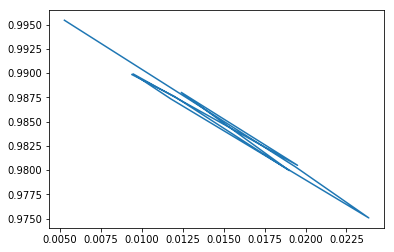

In [40]:
plt.plot(fprs, tprs)
plt.show()